# Glossary

In [3]:
import pandas as pd

class DataPreprocessing:
    def __init__(self, data_path) -> None:
        self.df = pd.read_csv(data_path, encoding='unicode_escape') 
    
    def extract_features(self):
        print('-----------------------------------------------')
        print('----- print 5 first rows of Data -------')
        print(self.df.head(5))
        print('-----------------------------------------------')

        print('-----------------------------------------------')
        print('----- Descriptive Statistical Measures of Data -------')
        print(self.df.describe())
        print('-----------------------------------------------')

        print('-----------------------------------------------')
        print('----- Summary of Data Frame -------')
        print(self.df.info())
        print('-----------------------------------------------')


        print('-----------------------------------------------')
        print('----- number of rows and columns of Data ---- ')
        print(self.df.shape)
        print('-----------------------------------------------')

        print('-----------------------------------------------')
        print('----- columns name ---- ')
        print(list(self.df.columns))
        print('-----------------------------------------------')

    def handle_missing_values(self, strategy='mean'):
        if strategy == 'mean':
            self.df.fillna(self.df.mean(), inplace=True)
        elif strategy == 'median':
            self.df.fillna(self.df.median(), inplace=True)
        elif strategy == 'mode':
            self.df.fillna(self.df.mode().iloc[0], inplace=True)
        elif strategy == 'drop':
            self.df.dropna(inplace=True)
        else:
            raise ValueError(f"Unknown strategy {strategy}")
        
    
data_preprocess = DataPreprocessing('spotify_songs.csv')
data_preprocess.extract_features()


-----------------------------------------------
----- print 5 first rows of Data -------
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    tra

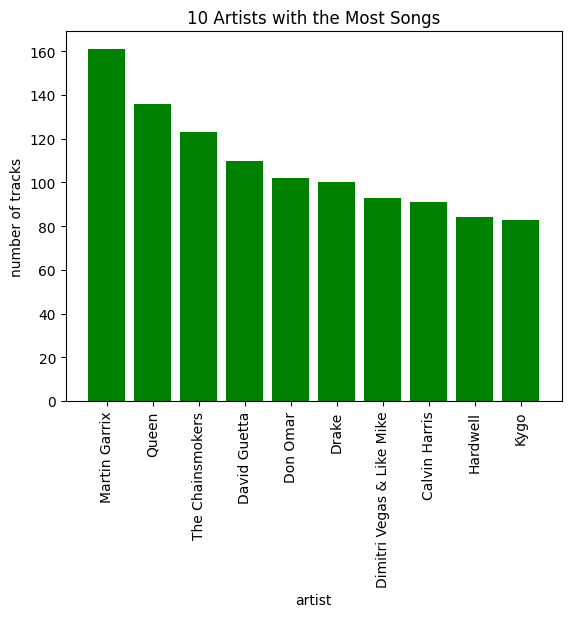

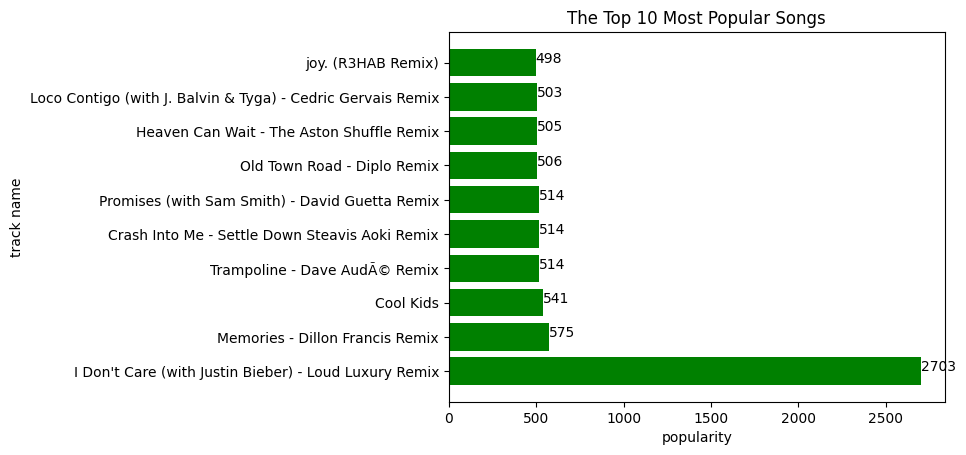

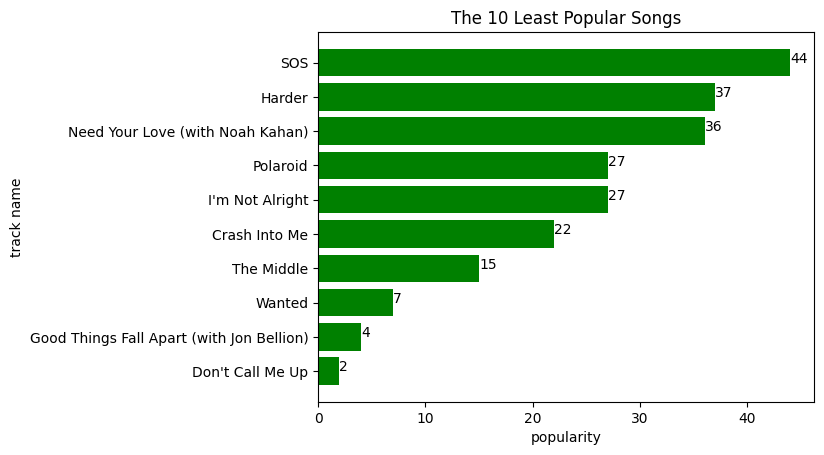

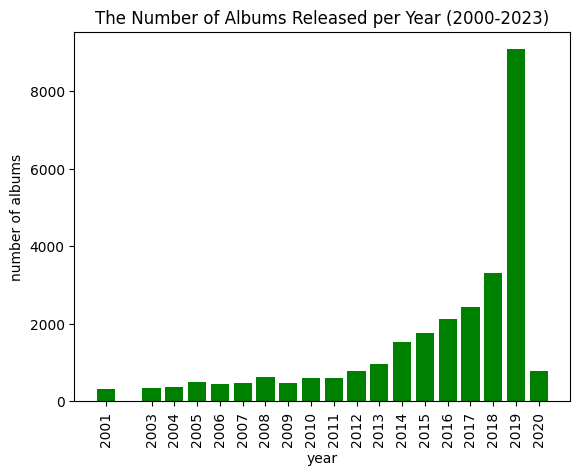

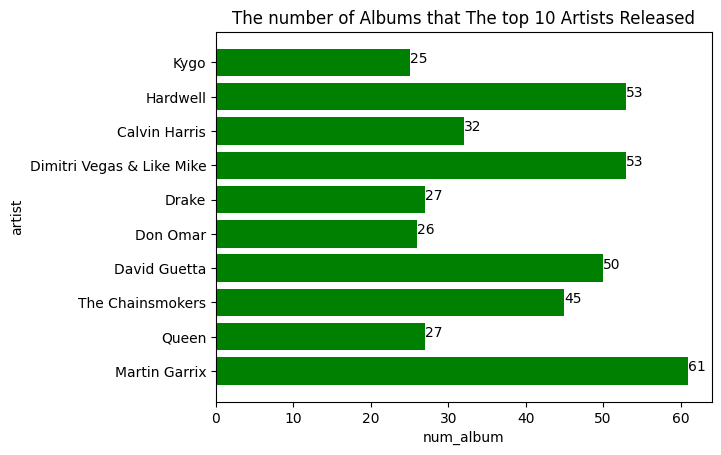

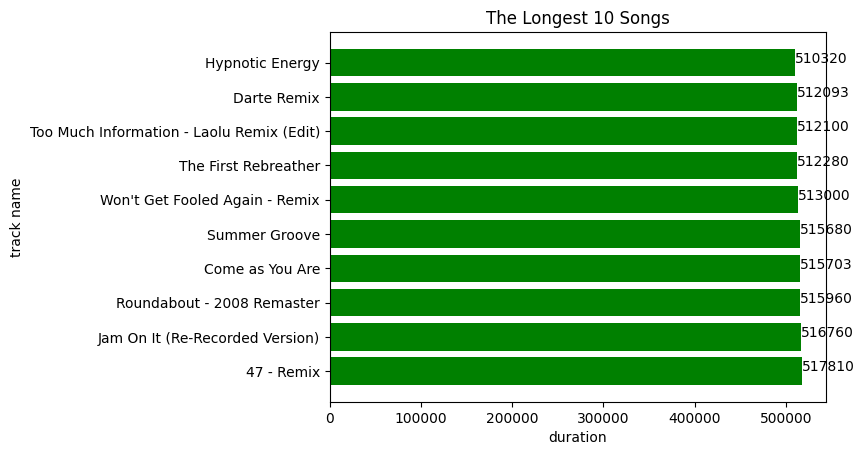

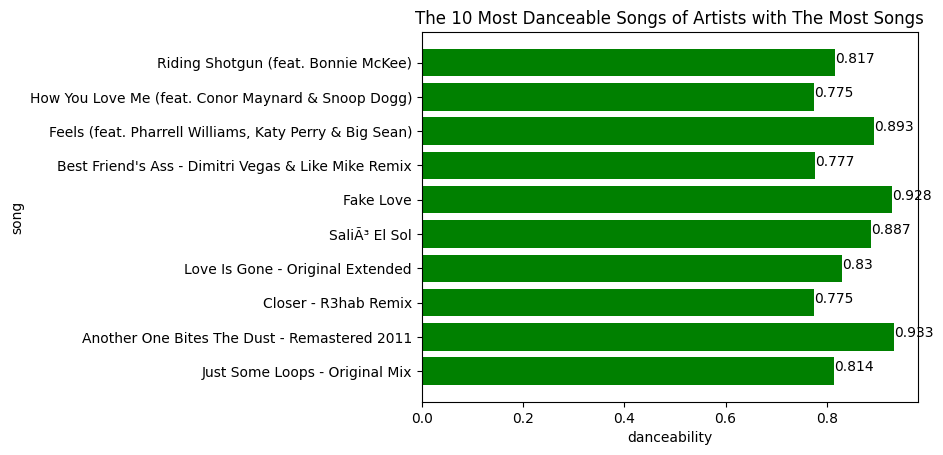

C:\Users\Gymnasiet\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


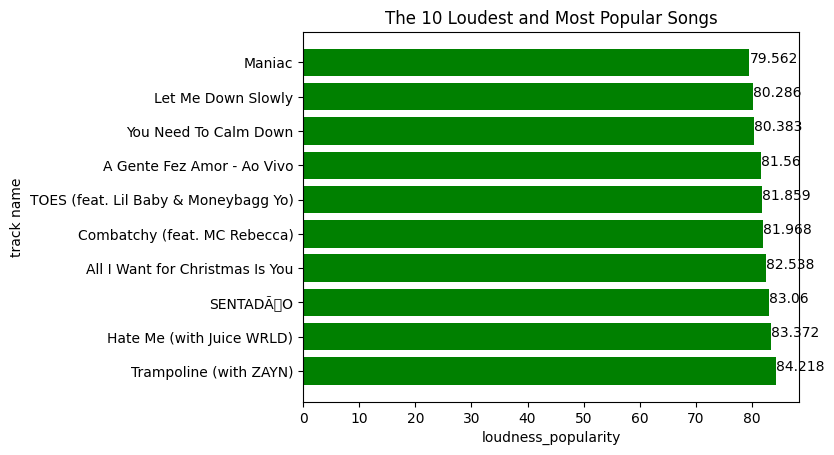

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as mcolors
import branca.colormap as cm

class Glossary:
    def __init__(self, data_path) -> None:
        self.df = pd.read_csv(data_path, encoding='unicode_escape')

    def addlabels(self, y):
        for index, value in enumerate(y):
            plt.text(value, index, str(value))
            
    def plot_histogram(self, x, y, color, xlabel, ylabel, title, rotation):
        plt.bar(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(x, rotation=rotation)
        plt.show()
           
    def plot_histogram_horizontal(self,x, y, color, xlabel, ylabel, title):
            plt.barh(x, y, color=color)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.title(title)
            self.addlabels(y)
            plt.show()

    def plot_multiple_bar(self,x, y1, y2, xlabel, ylabel, xticks, legend, title, rotation):
            bar_width = 0.2
            plt.bar(x - bar_width, y1, bar_width, color='cyan')
            plt.bar(x, y2, bar_width, color='red')
            plt.xticks(x, xticks, rotation = rotation )
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.legend(legend)
            plt.title(title)
            plt.show()

    def try_parsing_date(self, date_str, date_formats):
        for fmt in date_formats:
            try:
                return pd.to_datetime(date_str, format=fmt)
            except (ValueError, TypeError):
                continue
        return pd.NaT
    
    def extract_year(self):
        date_formats = ['%Y', '%Y-%m-%d', '%Y-%m']
        date_strings = self.df['track_album_release_date']
        self.df['date'] = [self.try_parsing_date(date, date_formats) for date in date_strings]
        self.df['year_column'] = self.df['date'].dt.year

    def sort_dataframe(self, sort_filter, sort_type):
        return self.df.sort_values(by=[sort_filter], ascending=sort_type)

    def counts_value(self, count_filter):
        return self.df[count_filter].value_counts()
    
    def loudness_popularity(self):
        self.df['track_loudness_popularity'] = self.df['loudness'] + self.df['track_popularity']

    def filter_channels(self, filter_type, color, xlabel, ylabel , title, num = 10, sort_type = False):
        df_sorted = self.sort_dataframe(filter_type,sort_type)
        df_sorted.drop_duplicates(subset='track_name', keep=False, inplace=True)

        self.plot_histogram_horizontal(x = df_sorted['track_name'][0:num],
                                       y = df_sorted[filter_type][0:num],
                                       color = color,
                                       xlabel = xlabel,
                                       ylabel = ylabel,
                                       title = title
                                        )
        
    def statistics_channels(self, filter_type, color, xlabel, ylabel, title, rotation, num = 10):
        statistic_channel = self.counts_value(filter_type)[0:num]

        self.plot_histogram(x = statistic_channel.index,
                            y = statistic_channel.values,
                            color = color,
                            xlabel = xlabel,
                            ylabel = ylabel,
                            title = title,
                            rotation = rotation
                            )
        
    def statistics_channels_2(self, filter_type1, filter_type2, color, xlabel, ylabel, title, sort_type = False, num = 10):
        statistic_channel = self.counts_value(filter_type1).sort_values(ascending = sort_type)[0:num]
        x = [self.df.loc[statistic_channel.index[i],filter_type2] for i in range(len(statistic_channel))]
        self.plot_histogram_horizontal(x = x,
                                      y = statistic_channel.values,
                                      color = color,
                                      xlabel = xlabel,
                                      ylabel = ylabel,
                                      title = title
                                      )
        
    def statistics_channels_3(self, filter_type1, filter_type2, color, xlabel, ylabel, title, sort_type = False, num = 10):
        statistic_channel = self.counts_value(filter_type1)[0:num]
        x = []
        for i in range(len(statistic_channel)):
            df_modify = self.df[self.df[filter_type1] == statistic_channel.index[i]]
            x.append(len(df_modify[filter_type2].value_counts().index))

        self.plot_histogram_horizontal(x = statistic_channel.index,
                                       y = x,
                                      color = color,
                                      xlabel = xlabel,
                                      ylabel = ylabel,
                                      title = title
                                      )

    def statistics_channels_4(self, filter_type1, filter_type2, color, xlabel, ylabel, title, sort_type = False, num = 10):
        counts = []
        songs = []
        st = df[filter_type1].value_counts()[0:num]
        for i in range(10):
            filtered_df = df[df[filter_type1] == st.index[i]]
            # Get the value counts for the value_column in the filtered DataFrame

            counts.append(filtered_df[filter_type2].sort_values(ascending = False).values[0])
            songs.append(filtered_df.loc[filtered_df[filter_type2].sort_values(ascending = False).index[0],'track_name'])

        self.plot_histogram_horizontal(x = songs,
                                       y = counts,
                                      color = color,
                                      xlabel = xlabel,
                                      ylabel = ylabel,
                                      title = title
                                        )      

if __name__ == '__main__':
      
      glossary = Glossary('spotify_songs.csv')

      
      # 1. 10 artists with the most songs
      glossary.statistics_channels(filter_type = 'track_artist',
                                  color = 'green',
                                  xlabel = 'artist',
                                  ylabel = 'number of tracks',
                                  title = '10 Artists with the Most Songs',
                                  rotation = 90
                                  )
      
      # 2.  the top 10 most popular songs
      glossary.statistics_channels_2(filter_type1 = 'track_popularity',
                                     filter_type2 = 'track_name',
                                     color = 'green',
                                     xlabel = 'popularity',
                                     ylabel = 'track name',
                                     title = 'The Top 10 Most Popular Songs'
                                  )
      
      # 3. the 10 least popular songs
      glossary.statistics_channels_2(filter_type1 = 'track_popularity',
                                     filter_type2 = 'track_name',
                                     color = 'green',
                                     xlabel = 'popularity',
                                     ylabel = 'track name',
                                     title = 'The 10 Least Popular Songs',
                                     sort_type = True
                                  )
      
      # 4. the number of albums that were released per year between 2000 and 2023
      glossary.extract_year()
      glossary.statistics_channels(filter_type = 'year_column',
                                     color = 'green',
                                     xlabel = 'year',
                                     ylabel = 'number of albums',
                                     title = 'The Number of Albums Released per Year (2000-2023)',
                                     rotation = 90,
                                     num = 19
                                  ) 
      
      # 5.  the number of albums that the top 10 artists released
      glossary.statistics_channels_3(filter_type1 = 'track_artist',
                                     filter_type2 = 'track_album_name',
                                     color = 'green',
                                     xlabel = 'num_album',
                                     ylabel = 'artist',
                                     title = 'The number of Albums that The top 10 Artists Released',
                                     sort_type = True
                                  )

    # 6. Show in a graph the longest 10 songs
      glossary.filter_channels(filter_type = 'duration_ms',
                               color = 'green',
                               xlabel = 'duration',
                               ylabel = 'track name',
                               title = 'The Longest 10 Songs',
                                  )
      
    # 7.  Show in a graph the 10 most danceable songs of artists with the most songs.
      glossary.statistics_channels_4(filter_type1 = 'track_artist',
                                     filter_type2 = 'danceability',
                                     color = 'green',
                                     xlabel = 'danceability',
                                     ylabel = 'song',
                                     title = 'The 10 Most Danceable Songs of Artists with The Most Songs',
                                  )
    
    # 8.  Show in a graph the 10 loudest and most popular songs.
      glossary.loudness_popularity()
      glossary.filter_channels(filter_type = 'track_loudness_popularity',
                               color = 'green',
                               xlabel = 'loudness_popularity',
                               ylabel = 'track name',
                               title = 'The 10 Loudest and Most Popular Songs',
                                  )